    Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

    Data Description :

    Undergrad : person is undergraduated or not
    Marital.Status : marital status of a person
    Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
    Work Experience : Work experience of an individual person
    Urban : Whether that person belongs to urban area or not



### Importing the required Libraries

In [1]:
# Importing the basic libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# importing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
fraud = pd.read_csv("Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### Performing EDA on the dataset

In [3]:
# to get the information of the datafile
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
# summarizing the datafile
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
# to check the null values of the data
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
print("Dimensions -",fraud.shape)
print("Column names -",fraud.columns)

Dimensions - (600, 6)
Column names - Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')


In [7]:
# summarising the information using crosstab
pd.crosstab(fraud['Work.Experience'],fraud['Urban']).mean()

Urban
NO     9.612903
YES    9.741935
dtype: float64

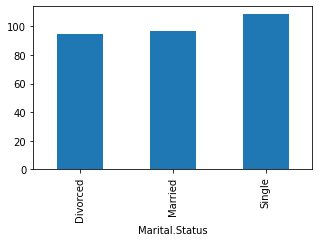

In [8]:
# Plotting barplot using crosstab function
plt.figure(figsize=(5,3))
pd.crosstab(fraud['Urban'],fraud['Marital.Status']).mean().plot(kind='bar');

In [9]:
# to check the dimensions of duplicates in the data
fraud[fraud.duplicated()].shape

(0, 6)

#### Encoding of Categorical Variables 

In [10]:
# Changing the datatype of the varibles from object to category to perform label encoding
fraud[['Undergrad','Marital.Status','Urban']] = fraud[['Undergrad','Marital.Status',
                                                       'Urban']].astype('category')
fraud1 = fraud
fraud1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    category
 1   Marital.Status   600 non-null    category
 2   Taxable.Income   600 non-null    int64   
 3   City.Population  600 non-null    int64   
 4   Work.Experience  600 non-null    int64   
 5   Urban            600 non-null    category
dtypes: category(3), int64(3)
memory usage: 16.3 KB


In [11]:
# label Encoding using cat.codes
fraud1['Undergrad'] = fraud1['Undergrad'].cat.codes
fraud1['Marital.Status'] = fraud1['Marital.Status'].cat.codes
fraud1['Urban'] = fraud1['Urban'].cat.codes

In [12]:
fraud1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


#### Now, Assuming that if Taxable.Income <= 30000, as "Risky = 0" and the others as "Good = 1".

In [13]:
# to get the minimum and maximum values of the column "Taxable.Income"
print("Min : ",fraud1["Taxable.Income"].min())
print("Max : ",fraud1["Taxable.Income"].max())

Min :  10003
Max :  99619


In [14]:
fraud1["Tax"] = pd.cut(fraud1["Taxable.Income"], bins = [10002,30000,99620], labels=["Risky", "Good"])
fraud1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [15]:
# label encoding for the 'Tax' column
fraud1[['Tax']] = fraud1[['Tax']].astype('category')
fraud2 = fraud1
fraud2['Tax'] = fraud2['Tax'].cat.codes
fraud2.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1


In [16]:
fraud2['Tax'].value_counts()

1    476
0    124
Name: Tax, dtype: int64

In [17]:
# to change Taxable.Income column as the first column
fraud2.insert(0, 'Taxable_Income', fraud2.iloc[:,2])
fraud2 = fraud2.drop(fraud2.columns[[3]], axis=1)
fraud2.head()

,Taxable_Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax
0,68833,0,2,50047,10,1,1
1,33700,1,0,134075,18,1,1
2,36925,0,1,160205,30,1,1
3,50190,1,2,193264,15,1,1
4,81002,0,1,27533,28,0,1


### Normalization of the data

In [18]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

fraud_norm = norm_func(fraud2.iloc[:,1:])
fraud_norm.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax
0,0.0,1.0,0.139472,0.333333,1.0,1.0
1,1.0,0.0,0.622394,0.600000,1.0,1.0
2,0.0,0.5,0.772568,1.000000,1.0,1.0
3,1.0,1.0,0.962563,0.500000,1.0,1.0
4,0.0,0.5,0.010081,0.933333,0.0,1.0


### Train and Test Split 
    Splitting the data into Train and Test data

In [19]:
X = fraud_norm.drop(['Tax'],axis=1)
y = fraud_norm['Tax']

In [20]:
print(X.head())
print('\n\n',y.head())

   Undergrad  Marital.Status  City.Population  Work.Experience  Urban
0        0.0             1.0         0.139472         0.333333    1.0
1        1.0             0.0         0.622394         0.600000    1.0
2        0.0             0.5         0.772568         1.000000    1.0
3        1.0             1.0         0.962563         0.500000    1.0
4        0.0             0.5         0.010081         0.933333    0.0


 0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Tax, dtype: float64


In [21]:
# Splitting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=5)

## Building Model

### Building Decision Tree Classifier using Entropy Criteria (C5.0)

In [22]:
# fitting the decision tree classifier model on the training data
model_entro= DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_entro.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

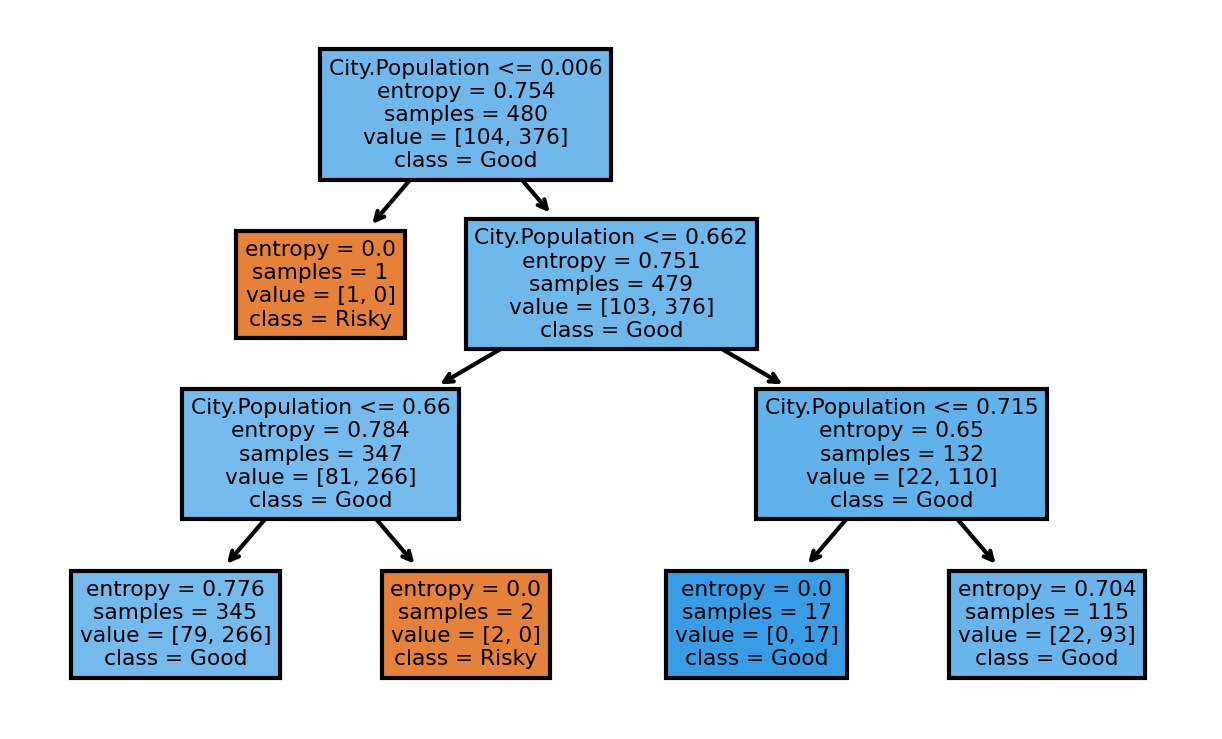

In [23]:
# to plot the decision tree
f_name = ['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn = ["Risky", "Good"]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,3), dpi=300)
tree.plot_tree(model_entro, feature_names=f_name, class_names=cn, filled=True);

In [24]:
# to get the decision tree plot in the text format for easy understanding 
text = tree.export_text(model_entro, max_depth=3)
print(text)

|--- feature_2 <= 0.01
|   |--- class: 0.0
|--- feature_2 >  0.01
|   |--- feature_2 <= 0.66
|   |   |--- feature_2 <= 0.66
|   |   |   |--- class: 1.0
|   |   |--- feature_2 >  0.66
|   |   |   |--- class: 0.0
|   |--- feature_2 >  0.66
|   |   |--- feature_2 <= 0.72
|   |   |   |--- class: 1.0
|   |   |--- feature_2 >  0.72
|   |   |   |--- class: 1.0



In [25]:
# to get the important features of the model
#model_entro.feature_importances_
f_imp = pd.Series(model_entro.feature_importances_, index=f_name).sort_values(ascending=False)
f_imp

City.Population    1.0
Undergrad          0.0
Marital.Status     0.0
Work.Experience    0.0
Urban              0.0
dtype: float64

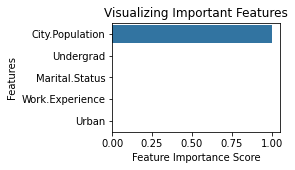

In [26]:
# to visualize the important features 
%matplotlib inline
# creating a bar plot
plt.figure(figsize=(3,2))
sns.barplot(x=f_imp, y=f_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [27]:
# Predictions on the test data
preds = model_entro.predict(X_test)
# getting the count of each category
pd.Series(preds).value_counts()

1.0    119
0.0      1
dtype: int64

In [28]:
# using crosstab function to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,0.0,1.0
Tax,,
0.0,0,20
1.0,1,99


In [29]:
# to get the Accuracy 
np.mean(preds==y_test)*100

82.5

In [30]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        20
         1.0       0.83      0.99      0.90       100

    accuracy                           0.82       120
   macro avg       0.42      0.49      0.45       120
weighted avg       0.69      0.82      0.75       120



### Building Decision Tree Classifier using Gini Criteria (CART)

In [31]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

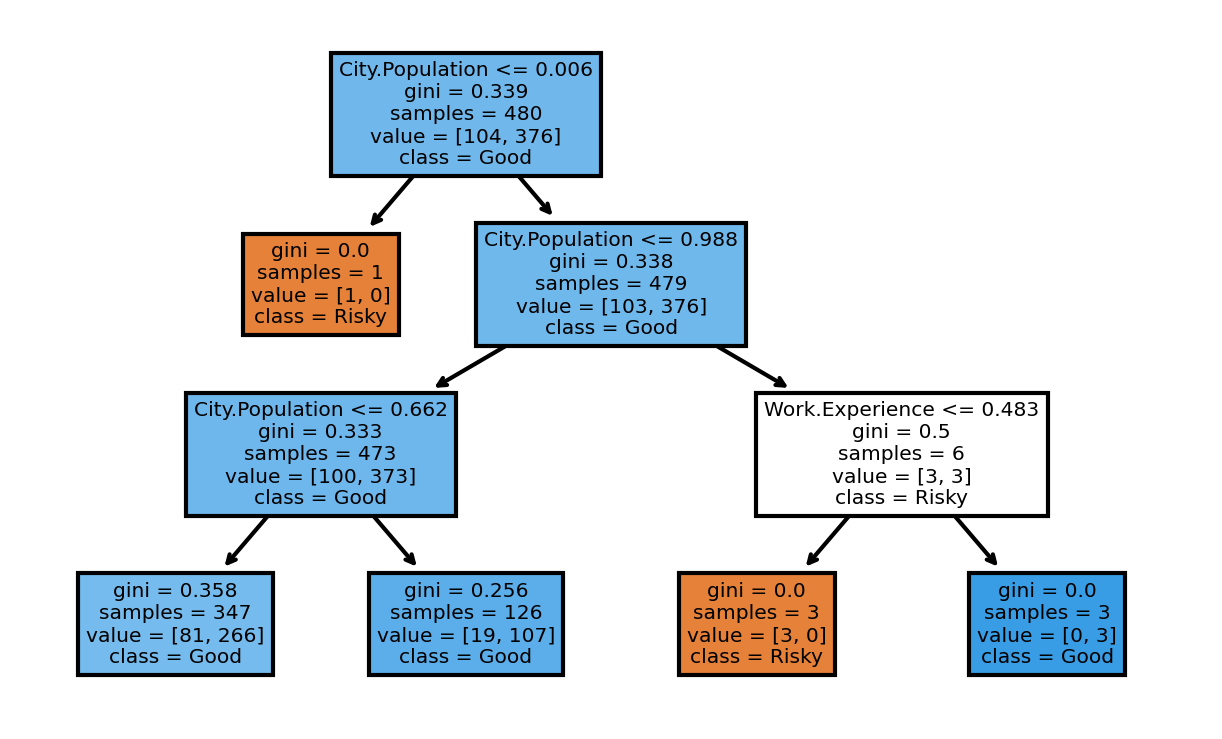

In [32]:
# to plot the decision tree
f_name = ['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn = ["Risky", "Good"]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,3), dpi=300)
tree.plot_tree(model_gini, feature_names=f_name, class_names=cn, filled=True);

In [33]:
# to get the important features of the model
#model_entro.feature_importances_
f_imp_ = pd.Series(model_gini.feature_importances_, index=f_name).sort_values(ascending=False)
f_imp_

City.Population    0.536969
Work.Experience    0.463031
Undergrad          0.000000
Marital.Status     0.000000
Urban              0.000000
dtype: float64

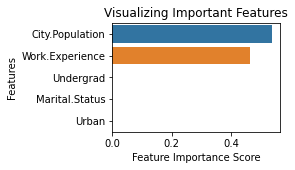

In [34]:
# to visualize the important features 
%matplotlib inline
# creating a bar plot
plt.figure(figsize=(3,2))
sns.barplot(x=f_imp_, y=f_imp_.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [35]:
# Predictions on the test data
pred = model_gini.predict(X_test)
# getting the count of each category
pd.Series(pred).value_counts()

1.0    118
0.0      2
dtype: int64

In [36]:
# to get the Accuracy 
np.mean(pred==y_test)*100

81.66666666666667

In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        20
         1.0       0.83      0.98      0.90       100

    accuracy                           0.82       120
   macro avg       0.42      0.49      0.45       120
weighted avg       0.69      0.82      0.75       120



### Conclusion
- The decision tree model is prepared on fraud data treating those who have taxable income <= 30000 as "Risky" and others are "Good".
- We have prepared two models using both Entropy and Gini Impurity methods.
- We got approximately same accuracy score for both the models as 82.5% and 81.6% respectively.